# Setup

> Lembrar de executar a próxima célula sempre que começar algo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

rc = {"font.family": "serif",  # fonte serifada
      "mathtext.fontset": "cm",  # texto matemático em LaTeX
      "font.size": 14,  # Usar tamanho 12 ou 14
      "axes.axisbelow": True,  # grid abaixo dos dados
      "text.usetex": True,
      "axes.grid": True}


plt.rcParams.update(rc)


def add_c_grid(a1=0.5, a2=0.5):
    ax.minorticks_on()
    ax.grid(which='major', alpha=a1)
    ax.grid(which='minor', alpha=a2)


def add_sci_limits(ax='both', limits=(0, 0)):
    plt.ticklabel_format(
        axis=ax,
        style='sci',
        useMathText=True,
        scilimits=limits)


# LAB 2 - Radiação de corpo negro

## Procedimento

### Tabela

In [2]:
tab_1 = pd.DataFrame({
    'Temperatura': 0.0,
    'Temperatura Recíproca': 0.0,
    'lambda max': 0.0
}, index=range(21))


In [3]:
temp_lambda = [
    [10000, 0.290],
    [9000, 0.322],
    [8000, 0.362],
    [7000, 0.414],
    [6000, 0.483],
    [5500, 0.527],
    [5000, 0.580],
    [4500, 0.644],
    [4000, 0.724],
    [3500, 0.828],
    [3000, 0.966],
    [2800, 1.035],
    [2600, 1.115],
    [2400, 1.207],
    [2200, 1.317],
    [2000, 1.449],
    [1800, 1.610],
    [1600, 1.811],
    [1400, 2.070],
    [1200, 2.415],
    [1000, 2.898],
]

temp, lambda_max = np.array(list(zip(*temp_lambda)))


In [4]:

tab_1['Temperatura'] = temp
tab_1['Temperatura Recíproca'] = 1/temp
tab_1['lambda max'] = lambda_max * 1e-6

tab_1.tail()


,Temperatura,Temperatura Recíproca,lambda max
16,1800.0,0.000556,0.000002
17,1600.0,0.000625,0.000002
18,1400.0,0.000714,0.000002
19,1200.0,0.000833,0.000002
20,1000.0,0.001000,0.000003


In [5]:
tab_1_latex = tab_1.copy()

tab_1_latex.rename({
  'Temperatura': r'Temperatura $[K]$',
  'Temperatura Recíproca': r'Temperatura Recíproca $[1 \times 10^{-3}  K^{-1}]$',
  'lambda max': r'$\lambda_{max}\, [\mu m]$'
}, inplace=True, axis=1)

tab_1_latex.iloc[:, 1] = tab_1_latex.iloc[:, 1] *1e3
tab_1_latex.iloc[:, 2] = tab_1_latex.iloc[:, 2] *1e6

tab_1_latex.head()

,Temperatura $[K]$,Temperatura Recíproca $[1 \times 10^{-3} K^{-1}]$,"$\lambda_{max}\, [\mu m]$"
0,10000.0,0.100000,0.290
1,9000.0,0.111111,0.322
2,8000.0,0.125000,0.362
3,7000.0,0.142857,0.414
4,6000.0,0.166667,0.483


In [6]:
tab_1_latex.to_latex(
  buf='./tab_1_preenchida.tex',
  bold_rows=True,
  escape=False,
  index=False,
  encoding='utf-8',
  header=True,
)

/tmp/ipykernel_6230/3331086975.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tab_1_latex.to_latex(


In [7]:
def regressao_polinomial(x, y, deg=1, return_all=False):
    coeficientes = np.polyfit(x, y, deg=deg)
    polinomio = np.poly1d(coeficientes)
    regressao = polinomio(x)
    return [coeficientes, polinomio, regressao] if return_all else regressao


In [8]:
t = tab_1['Temperatura Recíproca'].values
l = tab_1['lambda max'].values


coef, pol, reg = regressao_polinomial(x=t, y=l, return_all=True)


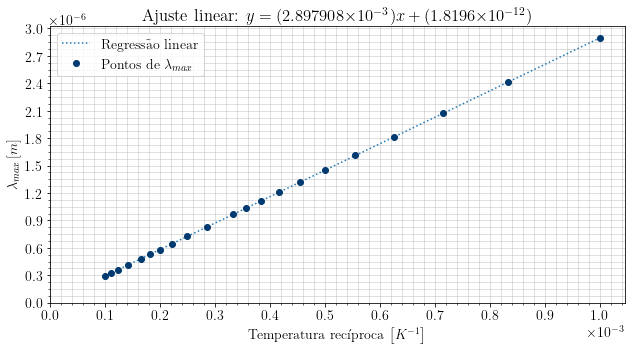

In [9]:
f, ax = plt.subplots(figsize=(9, 5))

ax.plot(t, reg, ':', label=f'Regressão linear')
ax.plot(tab_1['Temperatura Recíproca'], tab_1['lambda max'],
        linestyle='', marker='o', label='Pontos de $\lambda_{max}$', c='#003a70')


add_c_grid()
add_sci_limits()

ax.legend(loc='best')

ax.set(
    xlabel=r'Temperatura recíproca $\left[K^{-1}\right]$',
    ylabel=r'$\lambda_{max}\, [m]$',
    xticks=np.arange(0, 1.1e-3, 0.1e-3),
    yticks=np.arange(0, 3.1e-6, 0.3e-6)
)

f.tight_layout()

reta_str = f'$y = ({coef[0]*1e3:.6f}$' +  \
    r'$\times 10^{-3})x\, + $' + \
    f'$\,({coef[1]*1e12:.4f}$' +\
    r'$\times 10^{-12})$'

# ax.annotate(text=reta_str, xy=(0.4e-3, 0.6e-6))]

ax.set_title('Ajuste linear: ' + reta_str)

# ax.text(0.3e-3, 0.3e-6, reta_str, fontsize = 14, 
#          bbox = dict(facecolor = 'gray', alpha = 0.2, boxstyle='round'))

f.savefig('temp-rec-lambda-max.pdf')

plt.show()


In [10]:
(2.897908 - 2.897772)/(2.897772) * 100

0.004693260891483459